# Unemployment and Government Purchases
## Use government data from FRED to analyze economist's John Taylor's findings on government purchases correlating with unemployment rate
### Project for Quantitative Methods

In [1]:
# import data
gov <- read.csv( "Government Purchases.csv", stringsAsFactors=FALSE )
civ <- read.csv( "Civilian Unemployment Rate Seas_adjust.csv", stringsAsFactors=FALSE )
gdp <- read.csv( "GDP.csv", stringsAsFactors=FALSE )

# Data cleaning and setup

In [2]:
# remove data from civ to match date ranges of gov and gdp
civ <- civ[ -c( 847, 848 ), ]

# create month and quarter index and aggregate by quarter
civ$MonthNum <- rownames( civ )
civ$QuarterNum <- ceiling( as.numeric( civ$MonthNum ) / 3 )

civ_agg <- aggregate( UNRATE ~ QuarterNum, FUN=mean, data=civ )

In [3]:
# remove data from gov and gdp to match date ranges of civ
# remove 1947 data from gov
gov <- gov[ -c( 1:4 ), ]

# create quarter index for gov
gov$QuarterNum <- as.numeric( rownames( gov ) ) - 4

# remove 1947 data from gdp
gdp <- gdp[ -c( 1:4 ), ]

# create quarter index for gdp
gdp$QuarterNum <- as.numeric( rownames( gov ) ) - 4

# Question 1
## Plot government purchases as percent of gdp vs. unemployment rate

In [4]:
# merge dataframes
full_data <- merge( gov, civ_agg, by="QuarterNum" )
full_data <- merge( full_data, gdp, by="QuarterNum" )

# creater GDP percentage
full_data$percent <- full_data$GCE / full_data$GDP * 100

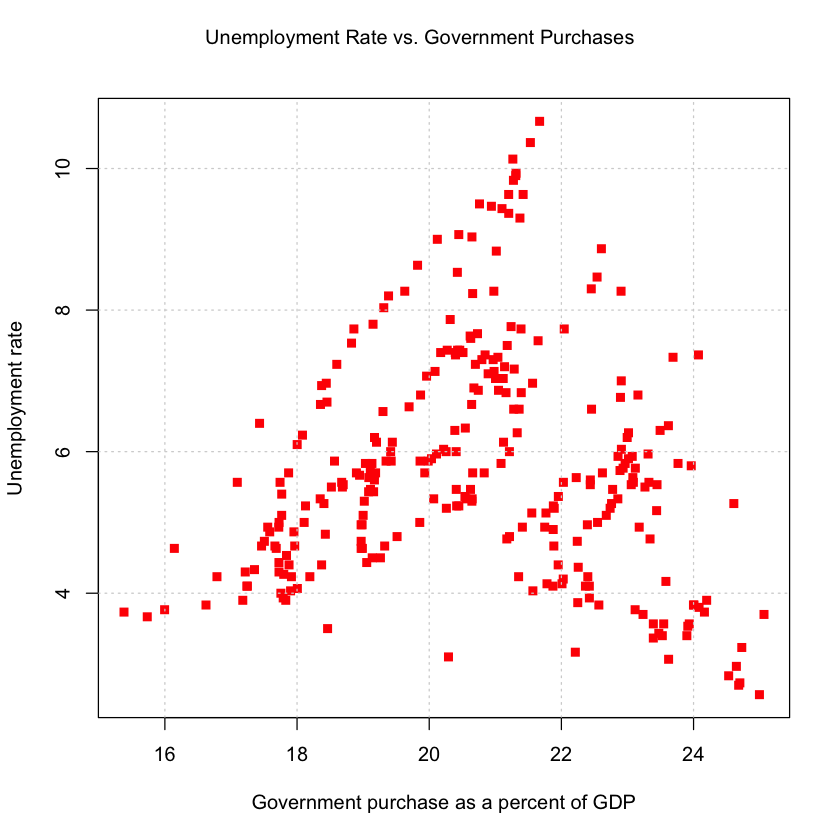

In [6]:
# plot purchases by unemployment rate
plot( full_data$percent, full_data$UNRATE,
      xlab="Government purchase as a percent of GDP",
      ylab="Unemployment rate",
      col="red", pch=15 )
panel.first=grid()
mtext( "Unemployment Rate vs. Government Purchases", side=3, line=-2, outer=TRUE )

# Question 2
## Recreate John Taylor's plot
### Q1 1990 to Q3 2010

In [7]:
# subset Q1 1990 to Q3 2010
past_data <- subset( full_data, c( QuarterNum >= 169 & QuarterNum <= 251 ) )

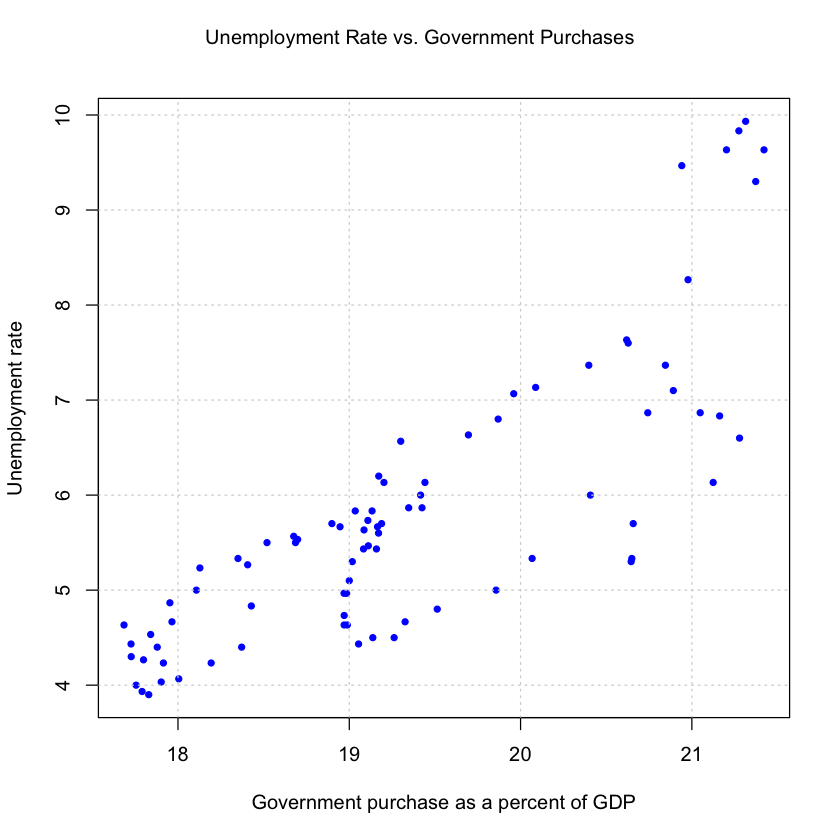

In [8]:
# plot Taylor's data
plot( past_data$percent, past_data$UNRATE,
      xlab="Government purchase as a percent of GDP",
      ylab="Unemployment rate",
      col="blue", pch=20 )
panel.first=grid()
mtext( "Unemployment Rate vs. Government Purchases", side=3, line=-2, outer=TRUE )

# Question 3
## Compare full data plot with Taylor's plot

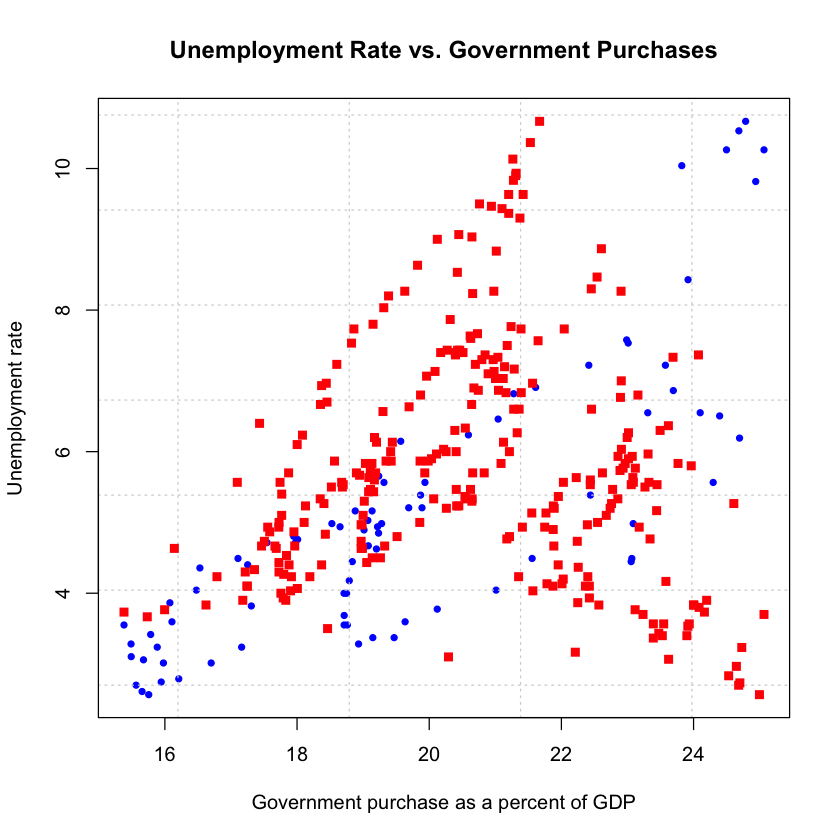

In [22]:
# overlay Taylor plot on full data
par( mfrow=c(1,1) )
plot( past_data$percent, past_data$UNRATE,
      axes=FALSE,
      xlab="",
      ylab="",
      col="blue", pch=20 )
panel.first=grid()
par( new=TRUE )
plot( full_data$percent, full_data$UNRATE,
      xlab="Government purchase as a percent of GDP",
      ylab="Unemployment rate",
      main="Unemployment Rate vs. Government Purchases",
      col="red", pch=15 )

# Question 4
## Analyze correlations by manipulating data

In [14]:
# full data correlation
cor( full_data$percent, full_data$UNRATE ) # no correlation

[1] -0.007594978

In [17]:
# compare correlations by decade
# subset decades
fifties <- subset( full_data, c( QuarterNum >= 9 & QuarterNum <= 48 ) )
sixties <- subset( full_data, c( QuarterNum >= 49 & QuarterNum <= 88 ) )
seventies <- subset( full_data, c( QuarterNum >= 89 & QuarterNum <= 128 ) )
eighties <- subset( full_data, c( QuarterNum >= 129 & QuarterNum <= 168 ) )
nineties <- subset( full_data, c( QuarterNum >= 169 & QuarterNum <= 208 ) )
two_k <- subset( full_data, c( QuarterNum >= 209 & QuarterNum <= 248 ) )
tens <- subset( full_data, c( QuarterNum >= 249 & QuarterNum <= 282 ) )

# check decade correlations
print( "1950's Correlation" )
cor( fifties$percent, fifties$UNRATE )
print( "1960's Correlation" )
cor( sixties$percent, sixties$UNRATE )
print( "1970's Correlation" )
cor( seventies$percent, seventies$UNRATE )
print( "1980's Correlation" )
cor( eighties$percent, eighties$UNRATE )
print( "1990's Correlation" )
cor( nineties$percent, nineties$UNRATE )
print( "2000's Correlation" )
cor( two_k$percent, two_k$UNRATE )
print( "2010's Correlation" )
cor( tens$percent, tens$UNRATE )

[1] "1950's Correlation"


[1] -0.1254425

[1] "1960's Correlation"


[1] -0.375209

[1] "1970's Correlation"


[1] -0.03041966

[1] "1980's Correlation"


[1] 0.4432329

[1] "1990's Correlation"


[1] 0.8254992

[1] "2000's Correlation"


[1] 0.8790177

[1] "2010's Correlation"


[1] 0.9736849

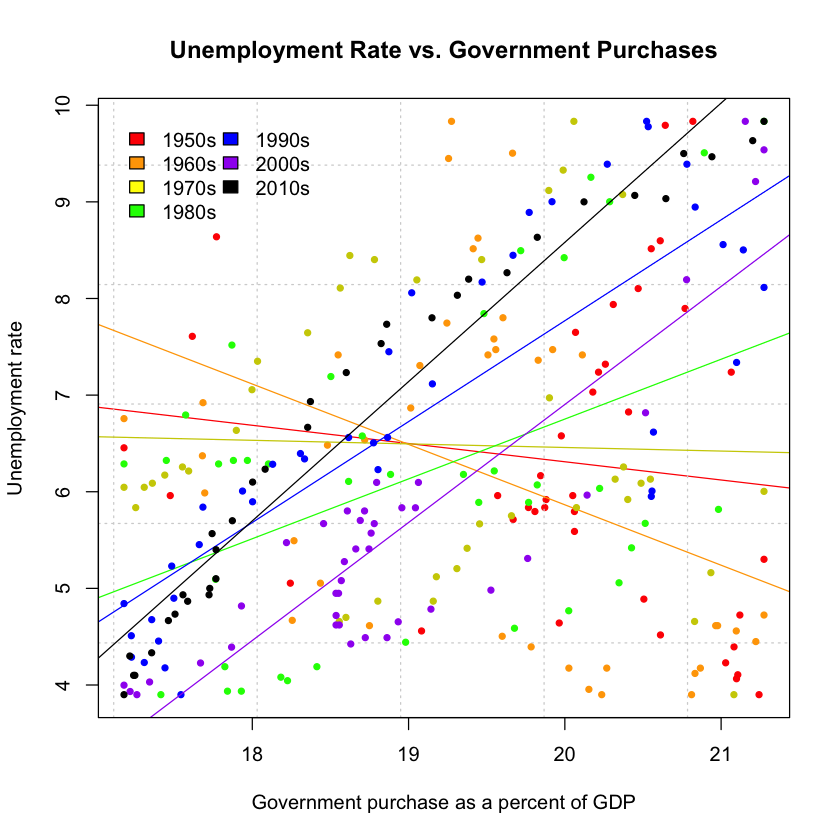

In [19]:
# plot each decade
par( mfrow=c(1,1) )
plot( fifties$percent, fifties$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="red", pch=20 )
abline( lm( fifties$UNRATE ~ fifties$percent), col="red" )
panel.first=grid()
par( new=TRUE )
plot( sixties$percent, sixties$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="orange", pch=20 )
abline( lm( sixties$UNRATE ~ sixties$percent), col="orange" )
par( new=TRUE )
plot( seventies$percent, seventies$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="yellow3", pch=20 )
abline( lm( seventies$UNRATE ~ seventies$percent), col="yellow3" )
par( new=TRUE )
plot( eighties$percent, eighties$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="green", pch=20 )
abline( lm( eighties$UNRATE ~ eighties$percent), col="green" )
par( new=TRUE )
plot( nineties$percent, nineties$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="blue", pch=20 )
abline( lm( nineties$UNRATE ~ nineties$percent), col="blue" )
par( new=TRUE )
plot( two_k$percent, two_k$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="purple", pch=20 )
abline( lm( two_k$UNRATE ~ two_k$percent), col="purple" )
par( new=TRUE )
plot( tens$percent, tens$UNRATE,
      xlab="Government purchase as a percent of GDP",
      ylab="Unemployment rate",
      main="Unemployment Rate vs. Government Purchases",
      col="black", pch=20 )
abline( lm( tens$UNRATE ~ tens$percent), col="black" )
legend( 17.1, 9.9, legend=c( "1950s", "1960s", "1970s", "1980s" ),
        fill=c( "red", "orange", "yellow", "green"),
        box.col="white", box.lty=0 )
legend( 17.7, 9.9, legend= c( "1990s", "2000s", "2010s" ),
        fill=c( "blue", "purple", "black" ),
        box.col="white", box.lty=0 )

In [20]:
# compare correlations by quarter
# create quarter index
full_data$Q <- full_data$QuarterNum%%4
full_data$Q <- ifelse( full_data$Q == 0, 4, full_data$Q )

# subset data by quarters
q1 <- subset( full_data, Q==1 )
q2 <- subset( full_data, Q==2 )
q3 <- subset( full_data, Q==3 )
q4 <- subset( full_data, Q==4 )

# check quarter correlation
print( "Quarter 1 Correlation" )
cor( q1$percent, q1$UNRATE )
print( "Quarter 2 Correlation" )
cor( q2$percent, q2$UNRATE )
print( "Quarter 3 Correlation" )
cor( q3$percent, q3$UNRATE )
print( "Quarter 4 Correlation" )
cor( q4$percent, q4$UNRATE )

[1] "Quarter 1 Correlation"


[1] 0.01868049

[1] "Quarter 2 Correlation"


[1] 0.0157463

[1] "Quarter 3 Correlation"


[1] -0.03178676

[1] "Quarter 4 Correlation"


[1] -0.03480014

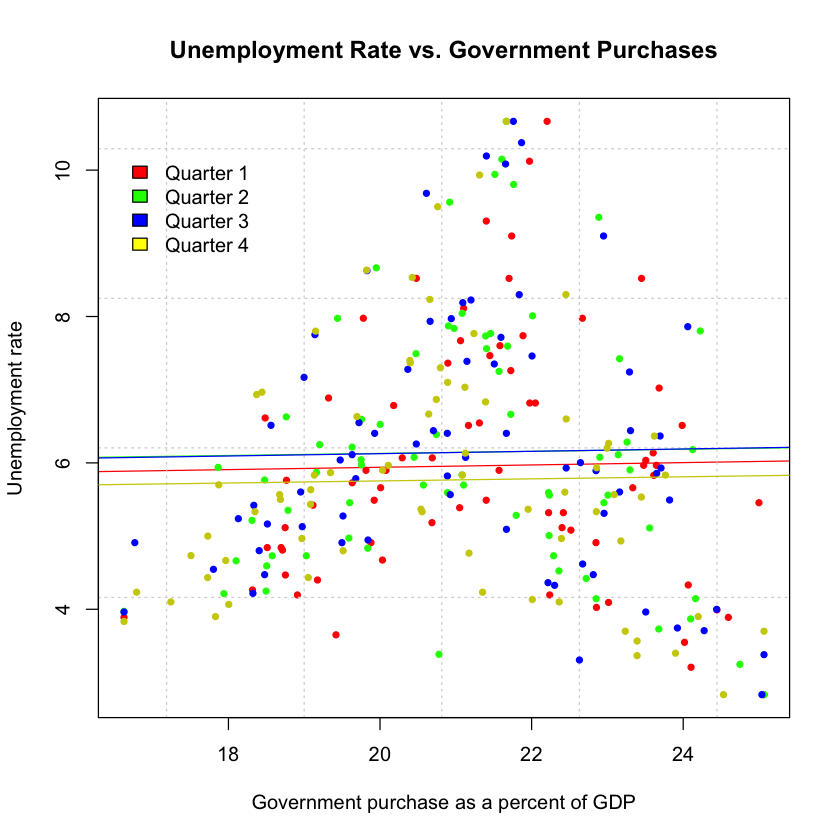

In [21]:
# plot data by quarters
plot( q1$percent, q1$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="red", pch=20 )
abline( lm( q1$UNRATE ~ q1$percent ), col="red" )
panel.first=grid()
par( new=TRUE )
plot( q2$percent, q2$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="green", pch=20 )
abline( lm( q2$UNRATE ~ q2$percent ), col="green" )
par( new=TRUE )
plot( q3$percent, q3$UNRATE,
      xlab="",
      ylab="",
      axes=FALSE,
      col="blue", pch=20 )
abline( lm( q1$UNRATE ~ q1$percent ), col="blue" )
par( new=TRUE )
plot( q4$percent, q4$UNRATE,
      xlab="Government purchase as a percent of GDP",
      ylab="Unemployment rate",
      main="Unemployment Rate vs. Government Purchases",
      col="yellow3", pch=20 )
abline( lm( q1$UNRATE ~ q1$percent ), col="yellow3" )
legend( 16.5, 10.3, legend=c( "Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4" ),
        fill=c( "red", "green", "blue", "yellow" ),
        box.col="white", box.lty=0 )